In [8]:
import pandas as pd
import numpy as np
from datetime import datetime
import plotly.graph_objects as go
import os

import matplotlib.pyplot as plt

In [2]:
os.getcwd()

'c:\\Users\\adame\\OneDrive\\Bureau\\CODE\\CandleMagic'

In [3]:
file = "data\\EURUSD_M1_231201_231215.csv"
df = pd.read_csv(file, sep="\t")
df['<DATETIME>'] = pd.to_datetime(df['<DATE>'] + ' ' + df['<TIME>'], format='%Y.%m.%d %H:%M:%S')
df = df.drop(['<DATE>', '<TIME>', '<VOL>', '<SPREAD>' ], axis=1)
df = df[['<DATETIME>'] + [col for col in df.columns if col != '<DATETIME>']]

In [5]:
df['SMA'] = df['<CLOSE>'].rolling(window=10).mean()
df['EMA'] = df['<CLOSE>'].ewm(span=10, adjust=False).mean()

In [9]:
df.iloc[:5]

,<DATETIME>,<OPEN>,<HIGH>,<LOW>,<CLOSE>,<TICKVOL>,SMA,EMA
0,2023-12-01 00:00:00,1.08845,1.08845,1.08845,1.08845,1,NaN,1.088450
1,2023-12-01 00:01:00,1.08844,1.08877,1.08768,1.08808,11,NaN,1.088383
2,2023-12-01 00:02:00,1.08808,1.08821,1.08764,1.08820,24,NaN,1.088350
3,2023-12-01 00:03:00,1.08830,1.08830,1.08820,1.08820,2,NaN,1.088322
4,2023-12-01 00:04:00,1.08830,1.08835,1.08830,1.08835,2,NaN,1.088327


In [22]:
int(10*0.75)

7.5

     <CLOSE>       SMA  High_Highs  Higher_Lows  Slope_Positive  Uptrend
0   0.357787       NaN       False        False           False    False
1   0.918572       NaN        True        False           False    False
2   2.001623       NaN        True        False           False    False
3   3.055425       NaN        True        False           False    False
4   1.677756       NaN       False        False           False    False
..       ...       ...         ...          ...             ...      ...
95  3.840235  4.338668       False        False           False    False
96  4.739835  4.375611        True         True            True     True
97  5.047134  4.384452        True         True            True     True
98  5.859996  4.446480        True         True            True     True
99  6.489625  4.633741        True         True            True     True

[100 rows x 6 columns]


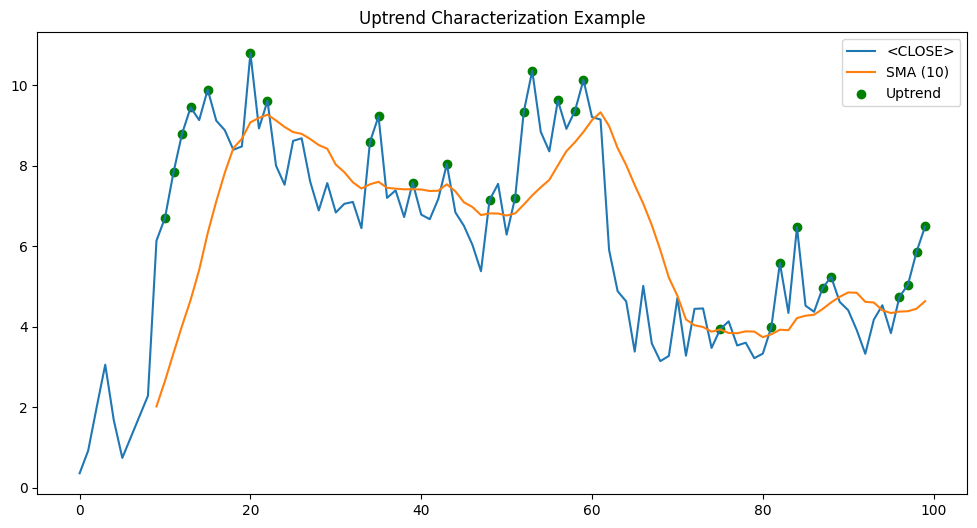

In [18]:
def characterize_uptrend(data, window=10):
    # Create a DataFrame with the time series data
    df = pd.DataFrame(data, columns=['<CLOSE>'])

    # Calculate Simple Moving Average (SMA) with a specified window
    df['SMA'] = df['<CLOSE>'].rolling(window=window).mean()

    # Identify higher highs and higher lows
    df['High_Highs'] = df['<CLOSE>'] > df['<CLOSE>'].shift(1)
    df['Higher_Lows'] = df['<CLOSE>'] > df['SMA']

    # Check for a positive slope of the trendline
    df['Slope_Positive'] = df['SMA'] > df['SMA'].shift(1)

    # Combine conditions to identify uptrend
    df['Uptrend'] = df['High_Highs'] & df['Higher_Lows'] & df['Slope_Positive']

    return df

def uptrend2(data, window = 10):
    df = pd.DataFrame(data, columns=['<CLOSE>'])
    

# Generate sample time series data
data = np.random.randn(100).cumsum()

# Characterize uptrend
result_df = characterize_uptrend(data)

# Print the DataFrame to see the results
print(result_df)

# Plot the data along with SMA and highlight the uptrend
plt.figure(figsize=(12, 6))
plt.plot(result_df['<CLOSE>'], label='<CLOSE>')
plt.plot(result_df['SMA'], label='SMA (10)')
plt.scatter(result_df.index[result_df['Uptrend']], result_df['<CLOSE>'][result_df['Uptrend']], color='green', label='Uptrend')
plt.legend()
plt.title('Uptrend Characterization Example')
plt.show()

In [15]:
result_df.iloc[:59]

,<CLOSE>,SMA,High_Highs,Higher_Lows,Slope_Positive,Uptrend
0,0.496714,NaN,False,False,False,False
1,0.358450,NaN,False,False,False,False
2,1.006138,NaN,True,False,False,False
3,2.529168,NaN,True,False,False,False
4,2.295015,NaN,False,False,False,False
5,2.060878,NaN,False,False,False,False
6,3.640091,NaN,True,False,False,False
7,4.407525,NaN,True,False,False,False
8,3.938051,NaN,False,False,False,False
9,4.480611,2.521264,True,True,False,False


In [29]:
filter_condition = (df['<DATETIME>'] > datetime(2023, 12, 4, 0, 0, 0)) & (df['<DATETIME>'] < datetime(2023, 12, 5, 0, 0, 0))

# Apply the filter to the DataFrame
filtered_df = df[filter_condition]

In [32]:
df1 = df[ (df["<DATETIME>"] > datetime(2023, 12, 4, 0, 0, 0)) & (df["<DATETIME>"] < datetime(2023, 12, 5, 0, 0, 0))]

In [34]:
fig = go.Figure(data=go.Candlestick(x=df1['<DATETIME>'],
                            open=df1['<OPEN>'],
                            high=df1['<HIGH>'],
                            low=df1['<LOW>'],
                            close=df1['<CLOSE>']))
fig.show()